# UTKFace Efficientnet Training with Distance Weight

In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB7Model, ResNet50Model, VGG16Model
from distancetraining import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

In [25]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

model_name = "efficientnet"
polynomial_save_file = f"{root}model/pickle/f1_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/efficientnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

In [26]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


Validation Accuracy: 0.4958 | Loss: 0.6689 | F1: 0.0017 | AUC: 0.7231
Validation Accuracy: 0.5218 | Loss: 0.6417 | F1: 0.1009 | AUC: 0.8165
Validation Accuracy: 0.6506 | Loss: 0.6010 | F1: 0.4810 | AUC: 0.8552
Validation Accuracy: 0.7072 | Loss: 0.5541 | F1: 0.6056 | AUC: 0.8769
Validation Accuracy: 0.7345 | Loss: 0.5072 | F1: 0.6539 | AUC: 0.8937
Validation Accuracy: 0.7559 | Loss: 0.4688 | F1: 0.6911 | AUC: 0.9077
Validation Accuracy: 0.7789 | Loss: 0.4414 | F1: 0.7279 | AUC: 0.9174
Validation Accuracy: 0.7731 | Loss: 0.4282 | F1: 0.7166 | AUC: 0.9248
Validation Accuracy: 0.7898 | Loss: 0.4072 | F1: 0.7424 | AUC: 0.9316
Validation Accuracy: 0.8096 | Loss: 0.3898 | F1: 0.7723 | AUC: 0.9358
Validation Accuracy: 0.8209 | Loss: 0.3735 | F1: 0.7891 | AUC: 0.9404
Validation Accuracy: 0.8465 | Loss: 0.3566 | F1: 0.8264 | AUC: 0.9451
Validation Accuracy: 0.8473 | Loss: 0.3481 | F1: 0.8263 | AUC: 0.9488
Validation Accuracy: 0.8314 | Loss: 0.3501 | F1: 0.8037 | AUC: 0.9517
Validation Accuracy:

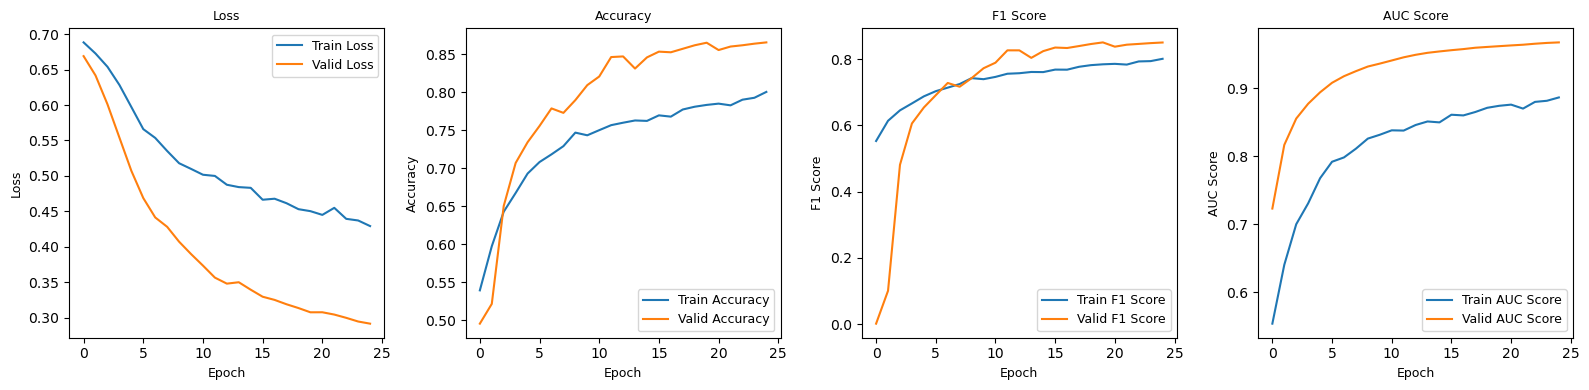

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 0.000002
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [28]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1181
           1       0.95      0.83      0.88      1203

    accuracy                           0.89      2384
   macro avg       0.90      0.89      0.89      2384
weighted avg       0.90      0.89      0.89      2384

Skin tone 1: Accuracy 0.8825561312607945
Skin tone 3: Accuracy 0.9217687074829932
Skin tone 0: Accuracy 0.9008264462809917
Skin tone 2: Accuracy 0.8594771241830066


In [29]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1171
           1       0.93      0.83      0.88      1177

    accuracy                           0.88      2348
   macro avg       0.89      0.88      0.88      2348
weighted avg       0.89      0.88      0.88      2348

Skin tone 1: Accuracy 0.9050179211469535
Skin tone 3: Accuracy 0.9060869565217391
Skin tone 2: Accuracy 0.8382838283828383
Skin tone 0: Accuracy 0.8883415435139573


# Resnet

In [30]:
model_name = "resnet"
polynomial_save_file = f"{root}model/pickle/f1_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/resnet/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.5797 | Loss: 0.6373 | F1: 0.3118 | AUC: 0.7798
Validation Accuracy: 0.7341 | Loss: 0.5003 | F1: 0.6577 | AUC: 0.8710
Validation Accuracy: 0.8037 | Loss: 0.4215 | F1: 0.7726 | AUC: 0.9079
Validation Accuracy: 0.8310 | Loss: 0.3851 | F1: 0.8176 | AUC: 0.9230
Validation Accuracy: 0.8138 | Loss: 0.3674 | F1: 0.7819 | AUC: 0.9349
Validation Accuracy: 0.8507 | Loss: 0.3409 | F1: 0.8383 | AUC: 0.9422
Validation Accuracy: 0.8624 | Loss: 0.3193 | F1: 0.8517 | AUC: 0.9499
Validation Accuracy: 0.8637 | Loss: 0.3147 | F1: 0.8533 | AUC: 0.9499
Validation Accuracy: 0.8654 | Loss: 0.2965 | F1: 0.8525 | AUC: 0.9554
Validation Accuracy: 0.8679 | Loss: 0.2799 | F1: 0.8574 | AUC: 0.9593
Validation Accuracy: 0.8830 | Loss: 0.2845 | F1: 0.8808 | AUC: 0.9580
Validation Accuracy: 0.8737 | Loss: 0.2838 | F1: 0.8659 | AUC: 0.9582
Validation Accuracy: 0.8859 | Loss: 0.2622 | F1: 0.8801 | AUC: 0.9645
Validation Accuracy: 0.8914 | Loss: 0.2743 | F1: 0.8885 | AUC: 0.9626
Validation Accuracy:

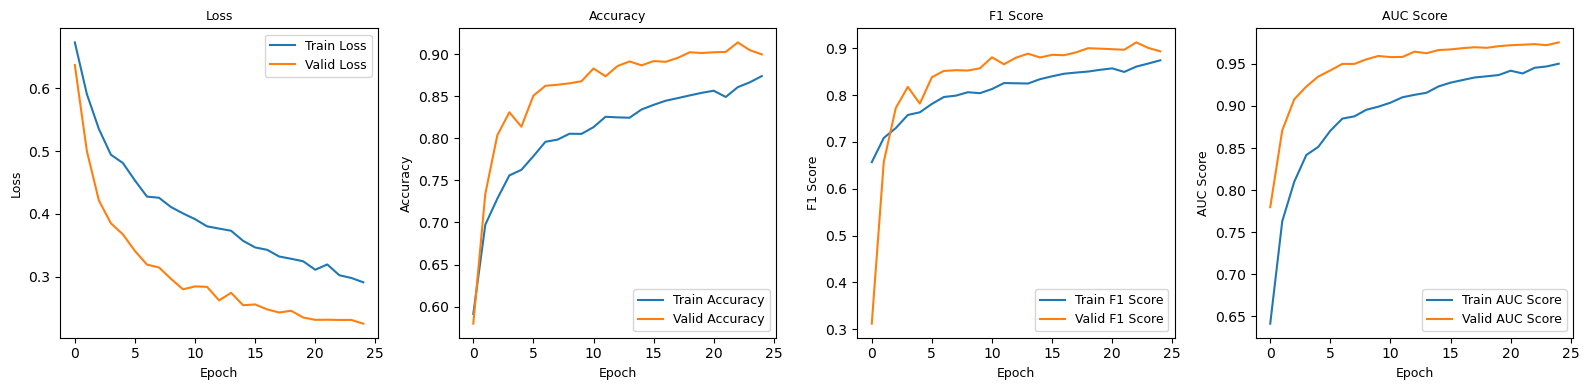

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [32]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1181
           1       0.94      0.88      0.91      1203

    accuracy                           0.91      2384
   macro avg       0.91      0.91      0.91      2384
weighted avg       0.92      0.91      0.91      2384

Skin tone 1: Accuracy 0.92573402417962
Skin tone 3: Accuracy 0.9268707482993197
Skin tone 0: Accuracy 0.915702479338843
Skin tone 2: Accuracy 0.8872549019607843


In [33]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1171
           1       0.94      0.87      0.90      1177

    accuracy                           0.91      2348
   macro avg       0.91      0.91      0.91      2348
weighted avg       0.91      0.91      0.91      2348

Skin tone 1: Accuracy 0.9175627240143369
Skin tone 3: Accuracy 0.9182608695652174
Skin tone 2: Accuracy 0.8696369636963697
Skin tone 0: Accuracy 0.9211822660098522


# VGG

In [34]:
model_name = "vgg"
polynomial_save_file = f"{root}model/pickle/f1_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/vgg/"
df_valid_filepath = f"{root}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"{root}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.7122 | Loss: 0.6520 | F1: 0.6842 | AUC: 0.7723
Validation Accuracy: 0.7341 | Loss: 0.6048 | F1: 0.7466 | AUC: 0.8061
Validation Accuracy: 0.7722 | Loss: 0.5247 | F1: 0.7630 | AUC: 0.8426
Validation Accuracy: 0.7848 | Loss: 0.4716 | F1: 0.7630 | AUC: 0.8684
Validation Accuracy: 0.8049 | Loss: 0.4514 | F1: 0.7945 | AUC: 0.8828
Validation Accuracy: 0.8125 | Loss: 0.4274 | F1: 0.8004 | AUC: 0.8949
Validation Accuracy: 0.8133 | Loss: 0.4047 | F1: 0.7931 | AUC: 0.9042
Validation Accuracy: 0.8184 | Loss: 0.3899 | F1: 0.7979 | AUC: 0.9162
Validation Accuracy: 0.8175 | Loss: 0.3744 | F1: 0.7922 | AUC: 0.9225
Validation Accuracy: 0.8381 | Loss: 0.3581 | F1: 0.8244 | AUC: 0.9266
Validation Accuracy: 0.8263 | Loss: 0.3519 | F1: 0.8049 | AUC: 0.9300
Validation Accuracy: 0.8523 | Loss: 0.3366 | F1: 0.8436 | AUC: 0.9359
Validation Accuracy: 0.8331 | Loss: 0.3392 | F1: 0.8124 | AUC: 0.9359
Validation Accuracy: 0.8574 | Loss: 0.3282 | F1: 0.8501 | AUC: 0.9396
Validation Accuracy:

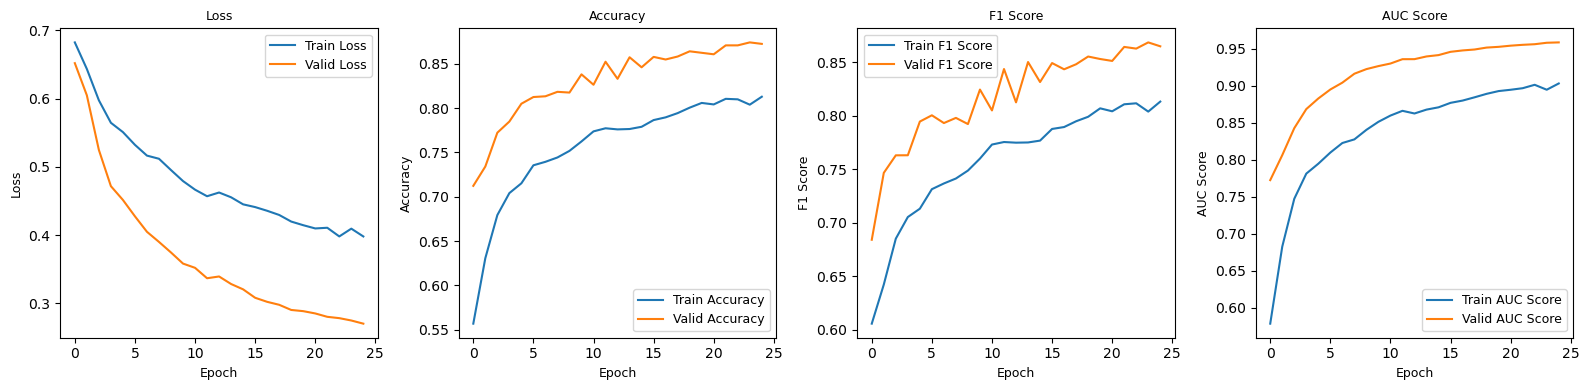

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 0.000001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [36]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1181
           1       0.90      0.86      0.88      1203

    accuracy                           0.88      2384
   macro avg       0.88      0.88      0.88      2384
weighted avg       0.88      0.88      0.88      2384

Skin tone 1: Accuracy 0.8756476683937824
Skin tone 3: Accuracy 0.9149659863945578
Skin tone 0: Accuracy 0.8842975206611571
Skin tone 2: Accuracy 0.8398692810457516


In [37]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)
trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1171
           1       0.89      0.86      0.88      1177

    accuracy                           0.88      2348
   macro avg       0.88      0.88      0.88      2348
weighted avg       0.88      0.88      0.88      2348

Skin tone 1: Accuracy 0.8853046594982079
Skin tone 3: Accuracy 0.9095652173913044
Skin tone 2: Accuracy 0.83003300330033
Skin tone 0: Accuracy 0.8981937602627258
